In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# scalar is to scale down predictors say sq. footage and number of bedrooms
%matplotlib inline

In [7]:
df = pd.read_csv('wdbc.data', header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

In [8]:
df.columns = column_names  # malignant column is our target

In [11]:
# Generalized for all classification problems - malignant vs benign
# Baseline for how dataset is set up

df['malignant'].value_counts()

B    357
M    212
Name: malignant, dtype: int64

In [12]:
df['malignant'].value_counts(normalize=True) # converts it to percentages normalize = True

# baseline accuracy is 62.7% or the percentage of majority class.  If create model that predicts benign on every given row
# then accuracy is 62.7% Want model to do better than 62.7%.  Don't want to be close to or worse than the baseline
# Need a model that does better than 62.7%

B    0.627417
M    0.372583
Name: malignant, dtype: float64

In [13]:
df.isnull().sum()  # to check nulls

id                   0
malignant            0
nucleus_mean         0
nucleus_se           0
nucleus_worst        0
texture_mean         0
texture_se           0
texture_worst        0
perimeter_mean       0
perimeter_se         0
perimeter_worst      0
area_mean            0
area_se              0
area_worst           0
smoothness_mean      0
smoothness_se        0
smoothness_worst     0
compactness_mean     0
compactness_se       0
compactness_worst    0
concavity_mean       0
concavity_se         0
concavity_worst      0
concave_pts_mean     0
concave_pts_se       0
concave_pts_worst    0
symmetry_mean        0
symmetry_se          0
symmetry_worst       0
fractal_dim_mean     0
fractal_dim_se       0
fractal_dim_worst    0
dtype: int64

In [17]:
#  Map to dictionary makes it easier for two or three classifiers

labels = {
    'M': 1,
    'B': 0
}

df['malignant'].map(labels)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: malignant, Length: 569, dtype: int64

In [18]:
df['malignant'] = df['malignant'].map(labels)  # redo data frame

In [20]:
df.corr()

,id,malignant,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
malignant,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
nucleus_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
nucleus_se,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
nucleus_worst,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
texture_se,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
texture_worst,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
perimeter_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
perimeter_se,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [21]:
df.corr()['malignant'].sort_values()  # sorts correlations from lowest to highest

smoothness_worst    -0.067016
area_mean           -0.012838
area_worst          -0.008303
concavity_mean      -0.006522
id                   0.039769
concavity_se         0.077972
compactness_se       0.253730
compactness_mean     0.292999
fractal_dim_worst    0.323872
perimeter_worst      0.330499
texture_se           0.358560
compactness_worst    0.408042
nucleus_se           0.415185
fractal_dim_se       0.416294
symmetry_mean        0.421465
concave_pts_mean     0.456903
smoothness_se        0.548236
smoothness_mean      0.556141
area_se              0.567134
symmetry_se          0.590998
texture_worst        0.596534
symmetry_worst       0.659610
perimeter_mean       0.696360
texture_mean         0.708984
nucleus_mean         0.730029
concave_pts_worst    0.733825
nucleus_worst        0.742636
concavity_worst      0.776454
perimeter_se         0.776614
concave_pts_se       0.782914
fractal_dim_mean     0.793566
malignant            1.000000
Name: malignant, dtype: float64

In [27]:
# split features and label column...x and y

y = df['malignant']
features = [col for col in df.columns if not col in ['id', 'malignant']]

# Or this: X = df.drop(['id', 'malignant], axis = 1)

X = df[features]

In [28]:
df.shape

(569, 32)

In [29]:
# Want to train, test, split right off the bat to test on before doing the model
# Want to test model on data it hasn't seen but not real world data
# Always best to train test split right off the bat
# Default is 20% cut or 0.20.  have 569 rows from above so 20% is 100 rows roughly.
# random_state means will get same random split every time to get reproducible results especially in projects
# it is an arbitrary number...42 is the meaning of life
# can set it to be stratified split so training data is 63% benign rest is malignant
# Maintains percentages from label column
# KNN require scaling 


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [30]:
#  Using means and stdevs from training data to transform test data

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [31]:
knn = KNeighborsClassifier()

In [32]:
# evaluate model score
# three scores so default is 3-fold cross validation so 3 iterations of 3 sets

cross_val_score(knn, X_train_scaled, y_train)

array([ 0.98591549,  0.97887324,  0.92957746])

In [33]:
# take the average of the three validation scores
# this becomes the accuracy score so 96% accuracy
# Still need to fit the model.

cross_val_score(knn, X_train_scaled, y_train).mean()

0.96478873239436613

In [34]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [35]:
knn.predict(X_test_scaled) # list of ones and zeros corresponding to test data

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0], dtype=int64)

In [37]:
predictions = knn.predict(X_test_scaled)

In [38]:
from sklearn.metrics import accuracy_score  # use to score the test set

In [39]:
accuracy_score(y_test, predictions)

# or knn.score(X_test_scaled, y_test)

0.95804195804195802

In [40]:
# Can look to see where things are going wrong

results = X_test.copy()
results['malignant'] = y_test
results['prediction'] = predictions

# rebuilding dataframe on test set
# dig in and see where model is getting things wrong

In [42]:
# look at incorrect guesses
# deeper dive into what is going wrong

results.loc[results['malignant'] != results['prediction'], :]

,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst,malignant,prediction
385,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836,1,0
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,113.70,975.2,0.1426,0.2116,0.3344,0.1047,0.2736,0.07953,1,0
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,117.70,989.5,0.1491,0.3331,0.3327,0.1252,0.3415,0.09740,1,0
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,109.50,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353,1,0
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,110.30,812.4,0.1411,0.3542,0.2779,0.1383,0.2589,0.10300,1,0
208,13.11,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,...,99.48,639.3,0.1349,0.4402,0.3162,0.1126,0.4128,0.10760,0,1


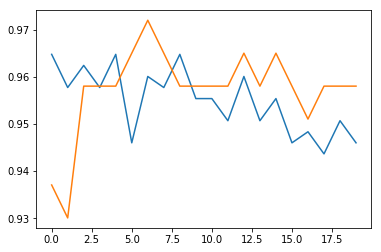

In [44]:
# try a bunch of different examples of k

scores = []  # accuracy scores
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = cross_val_score(knn, X_train_scaled, y_train).mean()  
    knn.fit(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
        
    scores.append([train_score, test_score])
    
plt.plot(scores)

In [ ]:
# Best score is 3-4